In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

geo = "GSE171517"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Duan2021")

27-Oct-2021 17:42:15 DEBUG utils - Directory ../Dataset/Duan2021 already exists. Skipping.
27-Oct-2021 17:42:15 INFO GEOparse - File already exist: using local version.
27-Oct-2021 17:42:15 INFO GEOparse - Parsing ../Dataset/Duan2021\GSE171517_family.soft.gz: 
27-Oct-2021 17:42:15 DEBUG GEOparse - DATABASE: GeoMiame
27-Oct-2021 17:42:15 DEBUG GEOparse - SERIES: GSE171517
27-Oct-2021 17:42:15 DEBUG GEOparse - PLATFORM: GPL18058
27-Oct-2021 17:42:15 DEBUG GEOparse - SAMPLE: GSM5226511
27-Oct-2021 17:42:15 DEBUG GEOparse - SAMPLE: GSM5226512
27-Oct-2021 17:42:15 DEBUG GEOparse - SAMPLE: GSM5226513
27-Oct-2021 17:42:15 DEBUG GEOparse - SAMPLE: GSM5226514
27-Oct-2021 17:42:16 DEBUG GEOparse - SAMPLE: GSM5226515
27-Oct-2021 17:42:16 DEBUG GEOparse - SAMPLE: GSM5226516
27-Oct-2021 17:42:16 DEBUG GEOparse - SAMPLE: GSM5226517
27-Oct-2021 17:42:16 DEBUG GEOparse - SAMPLE: GSM5226518
27-Oct-2021 17:42:16 DEBUG GEOparse - SAMPLE: GSM5226519
27-Oct-2021 17:42:16 DEBUG GEOparse - SAMPLE: GSM5226520

In [4]:
lookup_table = data.gpls["GPL18058"].table

In [7]:
lookup_table[lookup_table["Human_miRBase"] == "MIMAT0003300"]

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
3070,42700,hsa-miR-631,MIMAT0003300,NaN,NaN,NaN,NaN,hsa-miR-631,NaN


In [58]:
[t.table.set_index("ID_REF").loc[42700] for t in data.gsms.values()]

[VALUE    0.026926
 Name: 42700, dtype: float64,
 VALUE    0.001457
 Name: 42700, dtype: float64,
 VALUE    0.082211
 Name: 42700, dtype: float64,
 VALUE    0.031397
 Name: 42700, dtype: float64,
 VALUE   NaN
 Name: 42700, dtype: float64,
 VALUE    0.060398
 Name: 42700, dtype: float64,
 VALUE    0.081411
 Name: 42700, dtype: float64,
 VALUE    0.343711
 Name: 42700, dtype: float64,
 VALUE    0.185884
 Name: 42700, dtype: float64,
 VALUE    0.220117
 Name: 42700, dtype: float64,
 VALUE    0.126771
 Name: 42700, dtype: float64,
 VALUE    0.137128
 Name: 42700, dtype: float64]

In [12]:
data1.loc[42700]

VALUE    0.026926
Name: 42700, dtype: float64

In [52]:
table = pd.concat([val.table.iloc[:,min(1,i):] for i, val in enumerate(data.gsms.values())], axis=1).transpose()

In [55]:
table

,0,1,2,3,4,5,6,7,8,9,...,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542
ID_REF,13138.000000,42638.000000,42888.000000,17519.000000,17278.000000,46507.000000,17928.000000,42826.000000,17537.000000,42722.000000,...,169021.000000,168774.0,169286.000000,168902.000000,168880.000000,169301.00000,169077.000000,168816.0,169280.0,168835.000000
VALUE,28.164547,0.064323,0.360509,0.047868,0.031414,0.107704,NaN,0.949888,0.080778,0.064323,...,0.038893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001496
VALUE,48.563729,0.034960,0.093227,NaN,NaN,0.796795,NaN,1.308084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,9.863926,0.114812,0.060950,NaN,NaN,0.133239,NaN,1.206237,0.082211,0.011339,...,0.109142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,91.649922,0.053375,0.067504,NaN,NaN,0.065934,NaN,1.043956,0.051805,0.040816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,118.200340,NaN,NaN,NaN,NaN,0.210526,NaN,1.920204,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,26.656143,NaN,NaN,NaN,NaN,0.020590,NaN,0.997941,0.054907,0.012354,...,0.037062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,20.544098,0.065129,0.162822,NaN,NaN,0.028494,NaN,0.672999,0.100407,0.052917,...,0.075984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005427
VALUE,3.759651,0.170610,0.839352,0.004981,0.006227,0.230386,0.006227,2.073474,0.276463,0.022416,...,0.069738,NaN,NaN,0.014944,0.004981,NaN,0.002491,NaN,NaN,0.052304
VALUE,3.657582,0.360587,0.556254,0.005590,0.015374,0.381551,0.111810,1.327743,0.328442,0.048917,...,0.167715,NaN,NaN,0.012579,0.018169,0.00559,0.016771,NaN,NaN,0.064291


In [57]:
np.unique(table.isna().sum(), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([786, 174, 177, 179, 239, 415, 404, 472, 265, 148, 121,  99,  64],
       dtype=int64))

In [14]:
table = table.dropna(1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_12756/1927661217.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


In [15]:
mirnas = table.iloc[0, :].transpose().astype(int)
table = table.iloc[1:, :]

In [50]:
list(mirnas)[:10]

[13138, 46507, 42826, 46636, 11134, 17295, 42812, 42469, 27575, -1]

In [51]:
data1.index

Int64Index([ 13138,  42638,  42888,  17519,  17278,  46507,  17928,  42826,
             17537,  42722,
            ...
            169021, 168774, 169286, 168902, 168880, 169301, 169077, 168816,
            169280, 168835],
           dtype='int64', name='ID_REF', length=3543)

In [16]:
np.mean(table)

0       31.557016
5        0.272795
7        1.298599
11       1.140279
12       0.104513
          ...    
3522     2.330647
3524    21.434297
3526     0.336214
3527     0.244579
3529    11.895344
Length: 786, dtype: float64

In [17]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [18]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

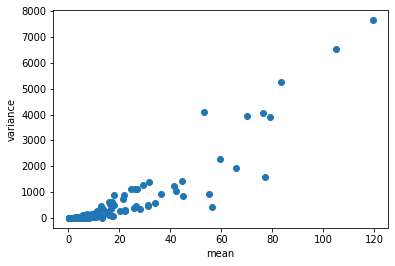

In [19]:
mean_variance_plot(table)

### Trying log-transformation

In [20]:
log_table = np.log2(table)

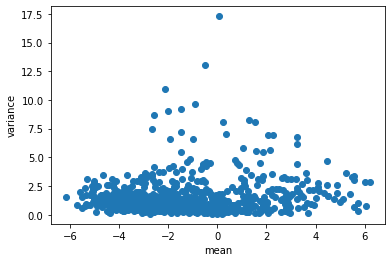

In [21]:
mean_variance_plot(log_table)

In [22]:
norm_log_table = log_table - np.mean(log_table)

In [23]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

In [24]:
norm_log_table.var().mean()

1.0

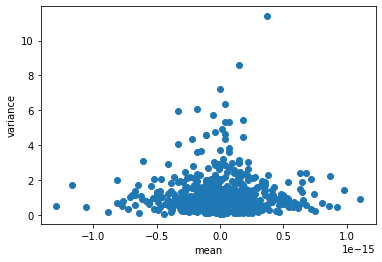

In [25]:
mean_variance_plot(norm_log_table)

In [26]:
pca = decomposition.PCA(n_components=2)

In [27]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [28]:
components = pca.transform(norm_log_table)

In [29]:
components

array([[ -6.21440201, -17.3618018 ],
       [-20.7505224 ,   5.76397303],
       [-11.71988461,  17.60981366],
       [-15.95587241, -10.92963902],
       [-24.19338705, -12.6921618 ],
       [-17.33620535,  11.37262106],
       [-10.10962328,   5.3207337 ],
       [ 15.02551961,  18.93246637],
       [ 23.98893711,   8.79474481],
       [ 27.1258914 ,   1.59510228],
       [ 17.77063317, -18.32867776],
       [ 22.36891583, -10.07717453]])

### Exporting data

In [31]:
id_lookup = data.gpls["GPL18058"].table
id_lookup.head()

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
0,10138,hsa-miR-130a-3p,MIMAT0000425,mmu-miR-130a-3p,MIMAT0000141,rno-miR-130a,MIMAT0000836,hsa-miR-130a-3p,NaN
1,10306,hsa-miR-146b-5p,MIMAT0002809,mmu-miR-146b-5p,MIMAT0003475,rno-miR-146b,MIMAT0005595,hsa-miR-146b-5p,NaN
2,105441,hsa-miR-518c-3p,MIMAT0002848,NaN,NaN,NaN,NaN,hsa-miR-518c-3p,NaN
3,10899,spike_control_v1_j,NaN,spike_control_v1_j,NaN,spike_control_v1_j,NaN,NaN,spike_control_v1_j
4,10901,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,NaN,hsa_negative_control_6


In [32]:
id_lookup = id_lookup.set_index("ID")

In [33]:
id_lookup.loc[mirnas[:10]]

,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
ID,,,,,,,,
13138,Hy3,NaN,Hy3,NaN,Hy3,NaN,NaN,Hy3
46507,hsa-miR-921,MIMAT0004971,NaN,NaN,NaN,NaN,hsa-miR-921,NaN
42826,NaN,NaN,mmu-miR-300-5p,MIMAT0004578,rno-miR-300-5p,MIMAT0004743,NaN,42826
46636,NaN,NaN,mcmv-miR-M23-1-5p,MIMAT0005542,NaN,NaN,NaN,46636
11134,hsa-miR-502-5p,MIMAT0002873,NaN,NaN,NaN,NaN,hsa-miR-502-5p,NaN
17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17295
42812,hsa-miR-508-5p,MIMAT0004778,NaN,NaN,NaN,NaN,hsa-miR-508-5p,NaN
42469,NaN,NaN,mmu-miR-181a-2-3p,MIMAT0005443,NaN,NaN,NaN,42469
27575,NaN,NaN,mmu-miR-711,MIMAT0003501,NaN,NaN,NaN,27575


In [42]:
42700 in list(mirnas)

False

In [34]:
mirbase_ids = id_lookup.loc[mirnas]["Human_miRBase"]

In [40]:
"MIMAT0003300" in list(mirbase_ids)

False

In [120]:
mask = np.logical_not(mirbase_ids.isna()).to_numpy()

In [121]:
mask[:10]

array([False,  True, False, False,  True, False,  True, False, False,
       False])

In [122]:
mirbase_ids = mirbase_ids[mask]

In [123]:
norm_log_table = norm_log_table.loc[:, mask]

In [124]:
from Scripts import converters

In [125]:
sequences = converters.mirbase_to_seq(mirbase_ids, ignore_not_found=True)

In [126]:
sequences.count(None)

2

In [127]:
sequences = np.array(sequences)

In [128]:
mask = sequences != None

In [129]:
sequences = sequences[mask]
norm_log_table = norm_log_table.loc[:, mask]

In [131]:
norm_log_table /= norm_log_table.var().mean()**0.5

In [132]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = np.array(6*[True] + 6*[False])

In [133]:
norm_log_table.to_csv("../TransformedData/Duan2021.csv", index=False)